In [ ]:
 In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?

 

BASIC ANALYSIS OF STOCK INFORMATION
In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock

In [ ]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
sns.set_style('whitegrid')
%matplotlib inline

Let's use yahoo to grab some tech stocks (Apple, Google, Microsoft and Amazon)

In [9]:
import yfinance as yf

In [5]:
from datetime import datetime
from __future__ import division

In [6]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [15]:
for stock in tech_list:
    data = yf.download(stock, start, end)
    globals()[stock] = data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [19]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,181.034901,182.504743,179.684743,181.164210,180.768991,5.772518e+07
std,8.831495,8.674123,8.780604,8.745174,8.717432,1.769618e+07
min,163.059998,165.279999,162.800003,163.759995,162.890533,2.404830e+07
25%,173.149994,174.589996,171.960007,173.570007,173.210495,4.677800e+07
50%,180.089996,181.929993,178.330002,180.570007,179.859741,5.366560e+07
75%,189.259995,189.990005,187.610001,189.300003,188.850006,6.418930e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [20]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-04-26 to 2024-04-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the stocks

<Axes: xlabel='Date'>

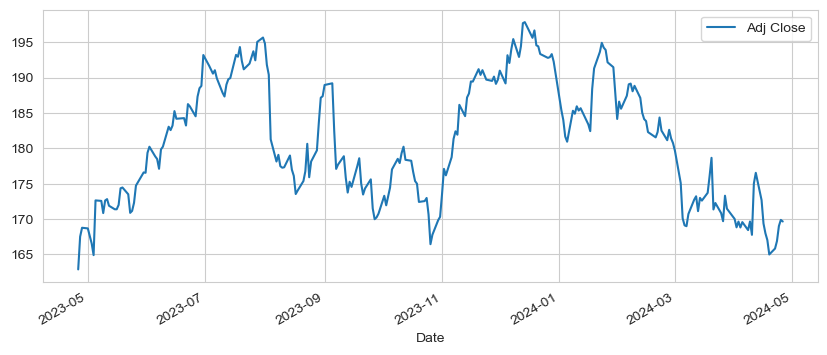

In [32]:
#the volume of stocks traded at Apple over the 1 year period
['Adj Close'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

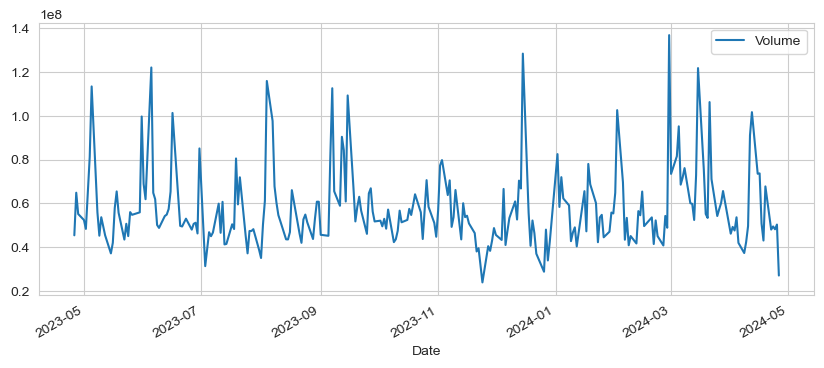

In [33]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

In [37]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))

    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

Now let's go ahead and plot all the additional Moving Averages

<Axes: xlabel='Date'>

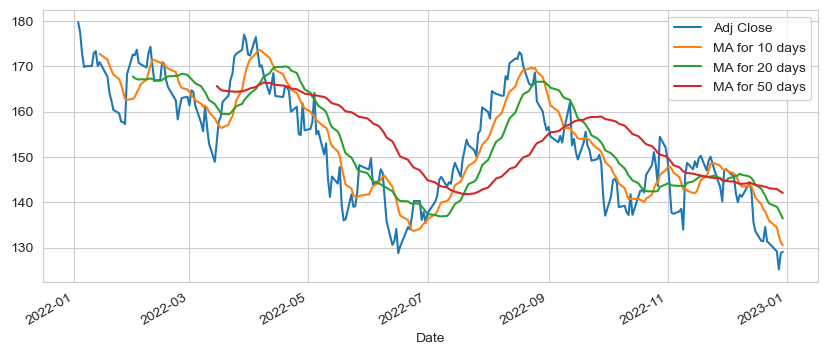

In [38]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

SECTION 2 - DAILY RETURN ANALYSIS

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve heh daily returns for the Apple stock.

<Axes: xlabel='Date'>

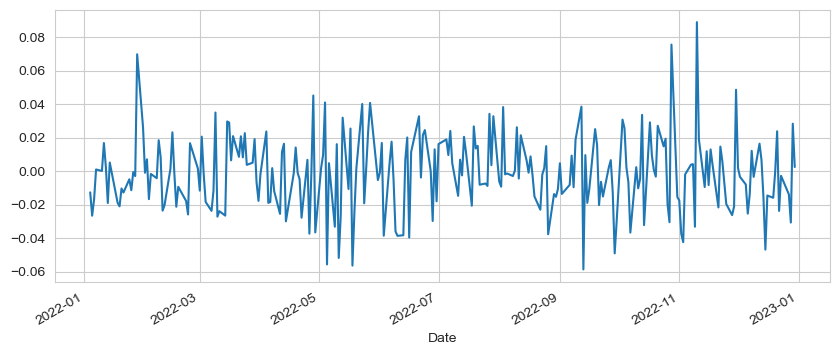

In [42]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4))

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

C:\Users\DR E.A MAJI\anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Daily Return', ylabel='Count'>

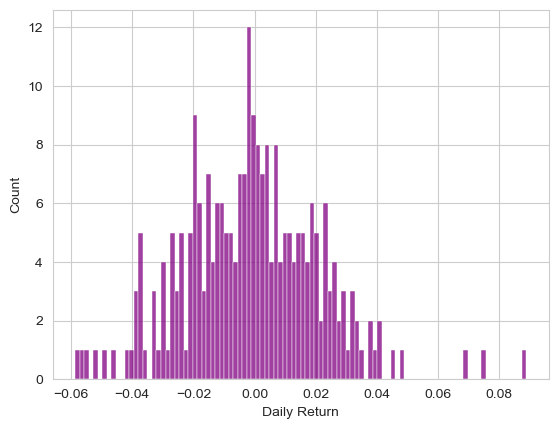

In [45]:
sns.histplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')

<Axes: >

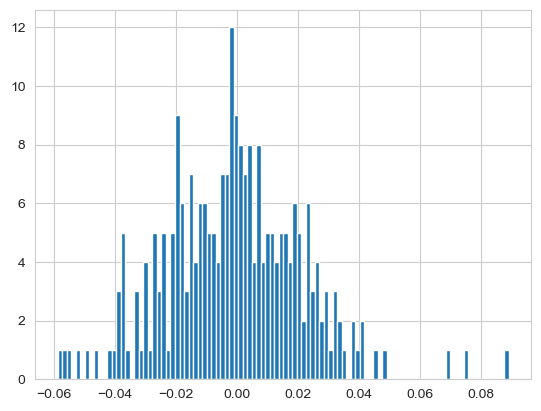

In [46]:
AAPL['Daily Return'].hist(bins=100)

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [49]:
closing_df = yf.download(tech_list,start,end)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [53]:
closing_df.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-04-26,162.890533,104.980003,104.449997,292.965515
2023-04-27,167.515854,109.820000,108.370003,302.348541
2023-04-28,168.779099,105.449997,108.220001,304.758759
2023-05-01,168.689575,102.050003,107.709999,303.072571
2023-05-02,167.645142,103.629997,105.980003,302.923798


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock

In [54]:
tech_rets = closing_df.pct_change()

In [57]:
tech_rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-04-26,NaN,NaN,NaN,NaN
2023-04-27,0.028395,0.046104,0.037530,0.032028
2023-04-28,0.007541,-0.039792,-0.001384,0.007972
2023-05-01,-0.000530,-0.032243,-0.004713,-0.005533
2023-05-02,-0.006191,0.015483,-0.016062,-0.000491


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

C:\Users\DR E.A MAJI\anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DR E.A MAJI\anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


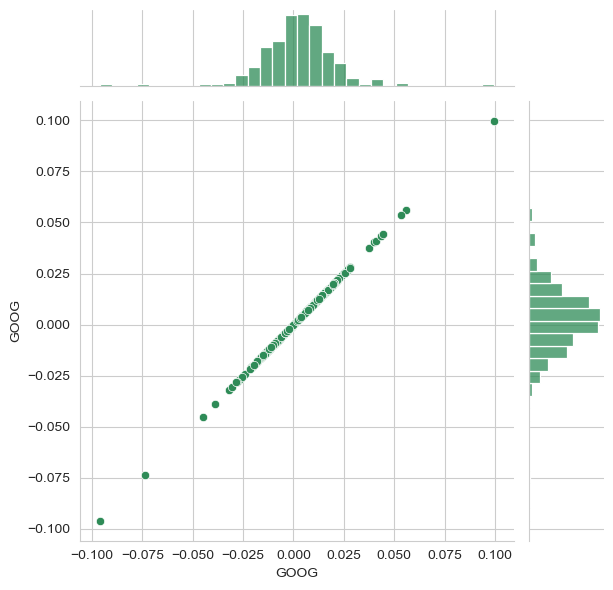

In [59]:
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind = 'scatter', color='seagreen')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Google and Microsoft the same way.

C:\Users\DR E.A MAJI\anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DR E.A MAJI\anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


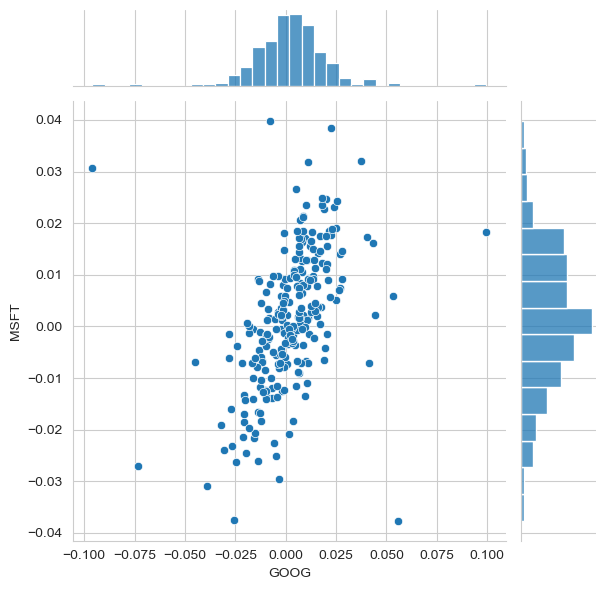

In [60]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind = 'scatter')

C:\Users\DR E.A MAJI\anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DR E.A MAJI\anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


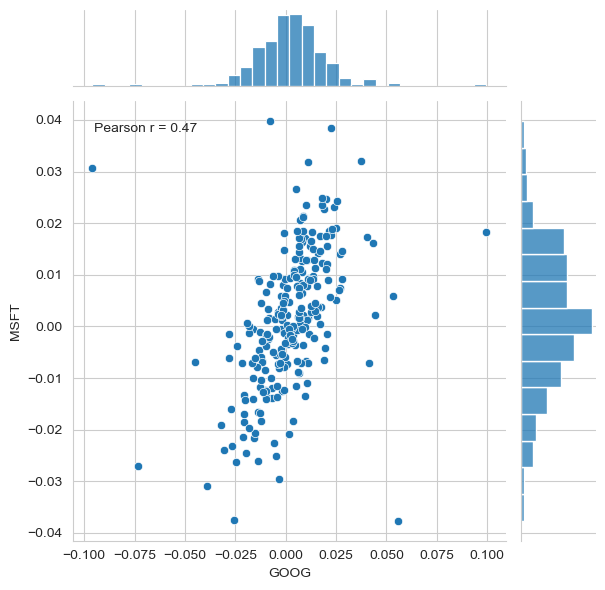

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

# Drop rows with NaN or infinite values
tech_rets_cleaned = tech_rets.replace([np.inf, -np.inf], np.nan).dropna()

# Create the joint plot
joint_plot = sns.jointplot(x='GOOG', y='MSFT', data=tech_rets_cleaned, kind='scatter')

# Calculate Pearson correlation coefficient
pearson_corr, _ = pearsonr(tech_rets_cleaned['GOOG'], tech_rets_cleaned['MSFT'])

# Annotate the plot with the Pearson correlation coefficient
joint_plot.ax_joint.annotate(f"Pearson r = {pearson_corr:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')

# Show the plot
plt.show()


Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

In [67]:
tech_rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-04-26,NaN,NaN,NaN,NaN
2023-04-27,0.028395,0.046104,0.037530,0.032028
2023-04-28,0.007541,-0.039792,-0.001384,0.007972
2023-05-01,-0.000530,-0.032243,-0.004713,-0.005533
2023-05-02,-0.006191,0.015483,-0.016062,-0.000491


Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

C:\Users\DR E.A MAJI\anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DR E.A MAJI\anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DR E.A MAJI\anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DR E.A MAJI\anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

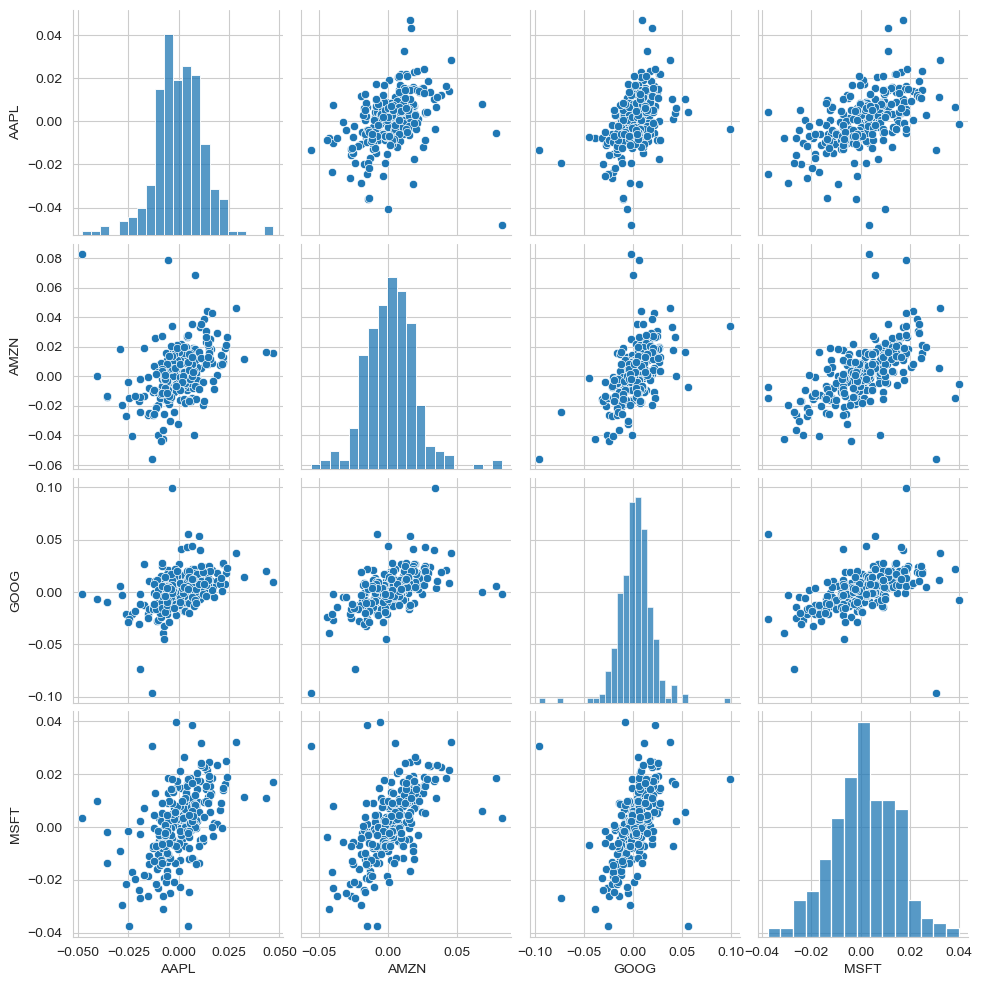

In [68]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

C:\Users\DR E.A MAJI\anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DR E.A MAJI\anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DR E.A MAJI\anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DR E.A MAJI\anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

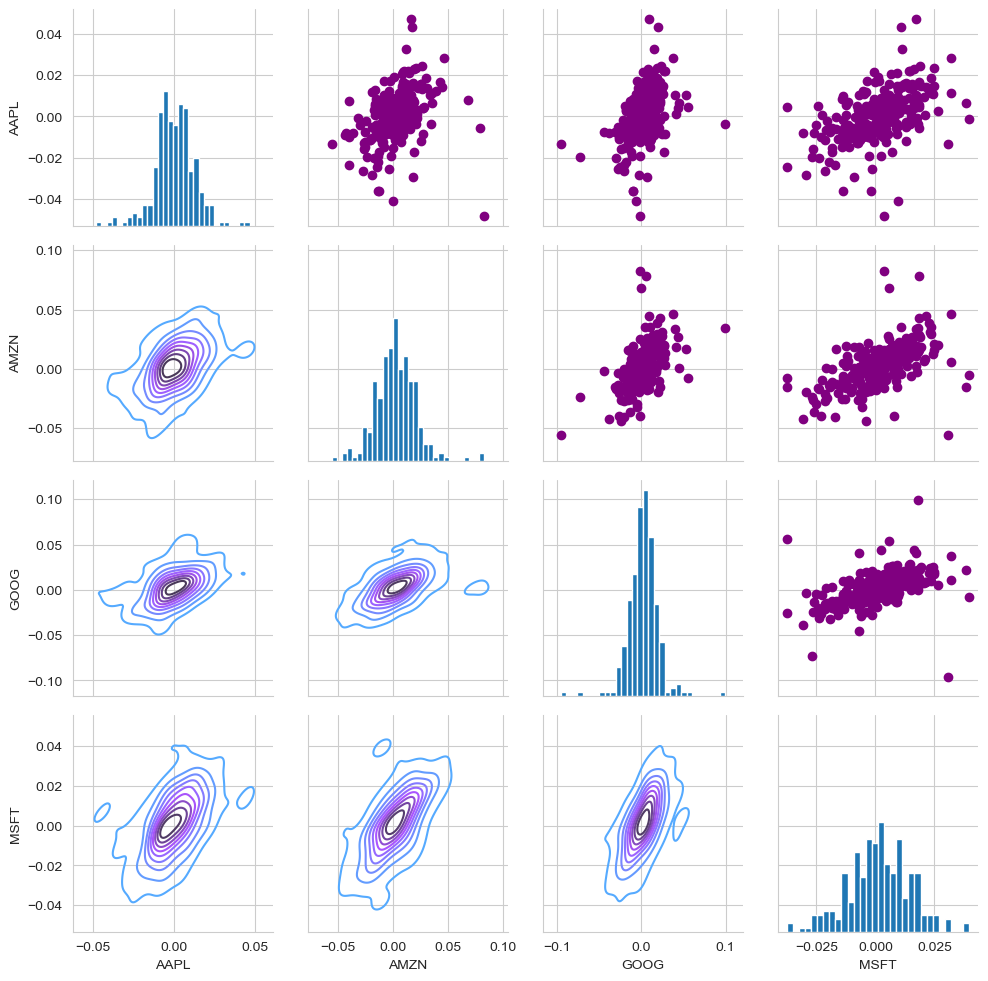

In [69]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)


We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

C:\Users\DR E.A MAJI\anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DR E.A MAJI\anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DR E.A MAJI\anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DR E.A MAJI\anaconda33\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

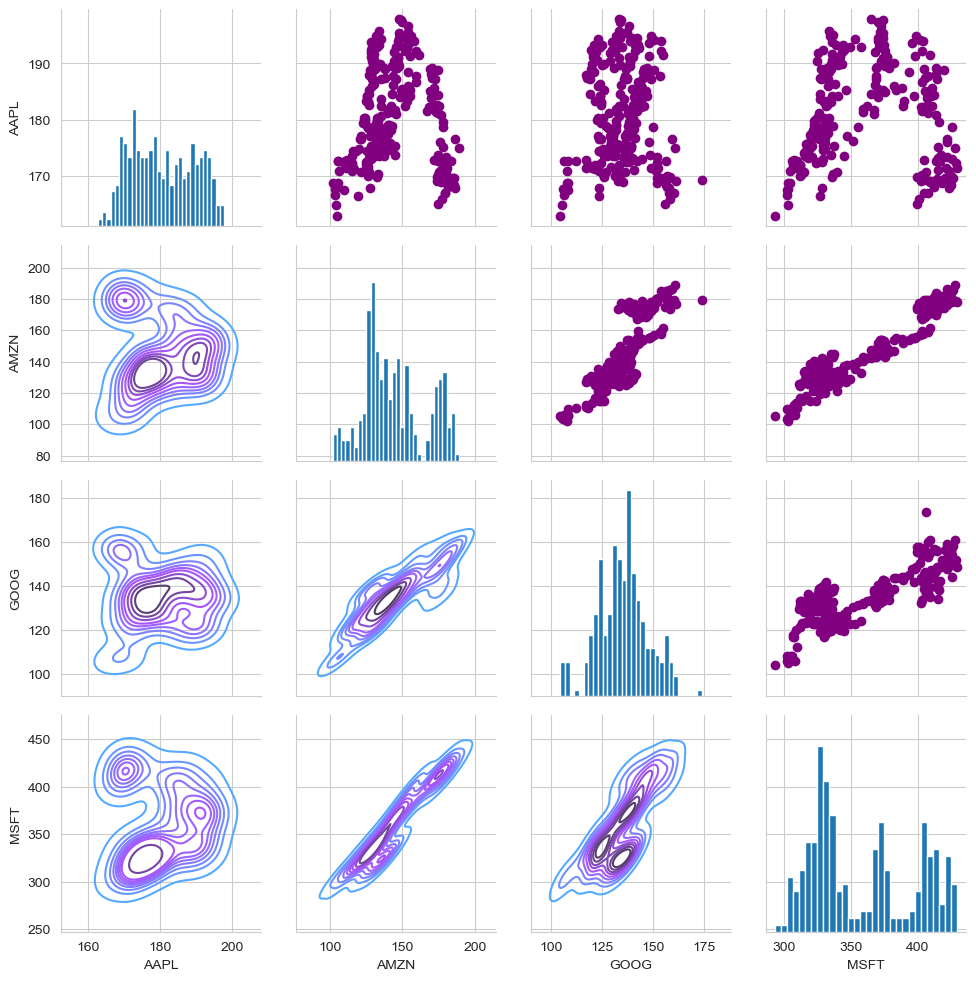

In [70]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

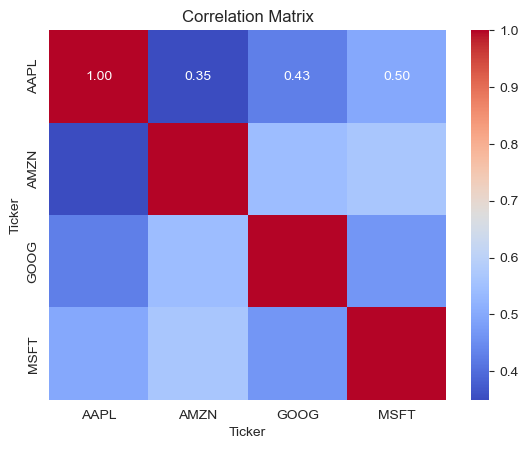

In [73]:
# Calculate the correlation matrix
corr_matrix = tech_rets.dropna().corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()
